In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.covariance import EmpiricalCovariance
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from scipy.spatial.distance import euclidean,cityblock,chebyshev,mahalanobis
from sklearn.datasets import make_swiss_roll,make_s_curve,make_circles,make_moons

In [2]:
def sampler(N_samples,frac,df,Gain = 1,K = 100,thr = 0.9,metric = euclidean):
    samples = []
    for i in range(N_samples):
            sample = df.sample(n = b,replace = True).values
            center = sample[np.random.choice(len(sample))]
            if metric is mahalanobis:
                cov = EmpiricalCovariance().fit(sample).covariance_
                alpha = np.exp(-K*np.array([metric(Bi,np.zeros(len(Bi)),cov)**2 for Bi in (sample-center)]))
            else:
                alpha = np.exp(-K*np.array([metric(Bi,np.zeros(len(Bi)))**2 for Bi in (sample-center)]))
            alpha = np.where(alpha<=thr,1e-7,alpha*Gain)
            weights = np.random.dirichlet(alpha)
            #if np.linalg.norm(sample.T@weights)>0.5:
            samples.append(sample.T@weights)
            #else:
                #samples.append(center)
    return pd.DataFrame(np.array(samples),columns = df.columns) 

## Example 1: Ring

In [3]:
X = lambda t: np.sin(t)
Y = lambda t: np.cos(t)
t = np.linspace(0,2*np.pi,1000)
x,y = [],[]
for i in t:
    x.append(X(i)+np.random.uniform(0,0.5))
    y.append(Y(i)+np.random.uniform(0,0.5))
B = np.array([x,y])
df = pd.DataFrame(B.T,columns = ['x','y'])

In [4]:
b = 10
Gain = 1
K = 0.8
thr = 0.8
samp = sampler(5000,b,df,Gain = Gain,K =K,thr = thr,metric = euclidean)
df_O = samp

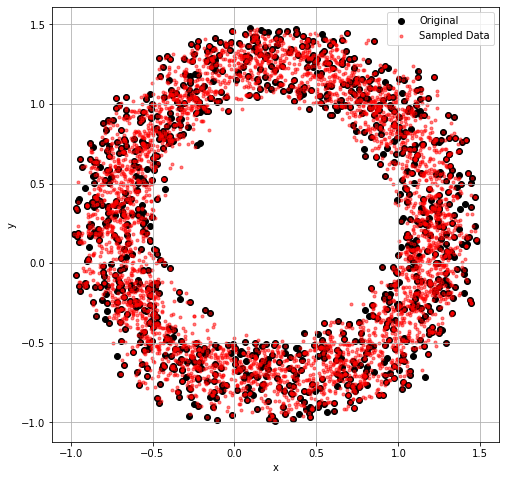

In [7]:
g = plt.figure(figsize = (8,8))
with sns.color_palette("rainbow",10):
    plt.scatter(df['x'],df['y'],color = 'black',alpha = 1,label = 'Original')
    plt.scatter(df_O['x'],df_O['y'],marker = '.',color = 'red',alpha = 0.5,label = 'Sampled Data')
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')

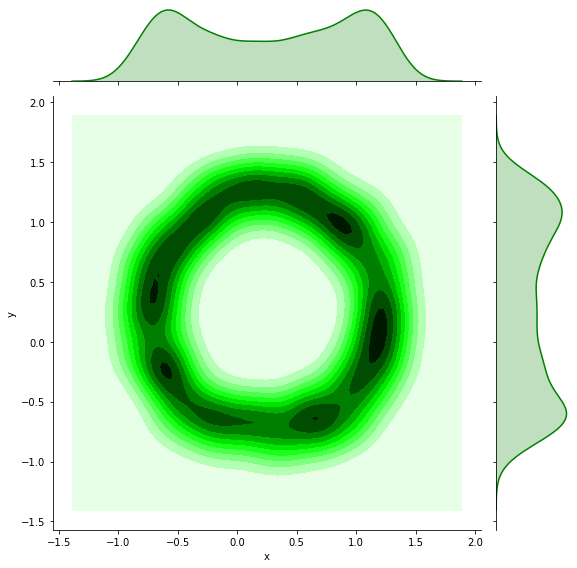

In [6]:
sns.jointplot(df_O['x'],df_O['y'],kind = 'kde',color = 'green',height = 8)

## Example 2: Swiss Roll

In [18]:
n_samples = 1000
noise = 0.01
X, _ = make_swiss_roll(n_samples,noise = noise)#
df = pd.DataFrame(X,columns = ['x','y','z'])
b = 250
Gain = 1
K = 1e-2
thr = 0.8
df_O = sampler(50000,b,df,Gain = Gain,K =K,thr = thr,metric = euclidean)

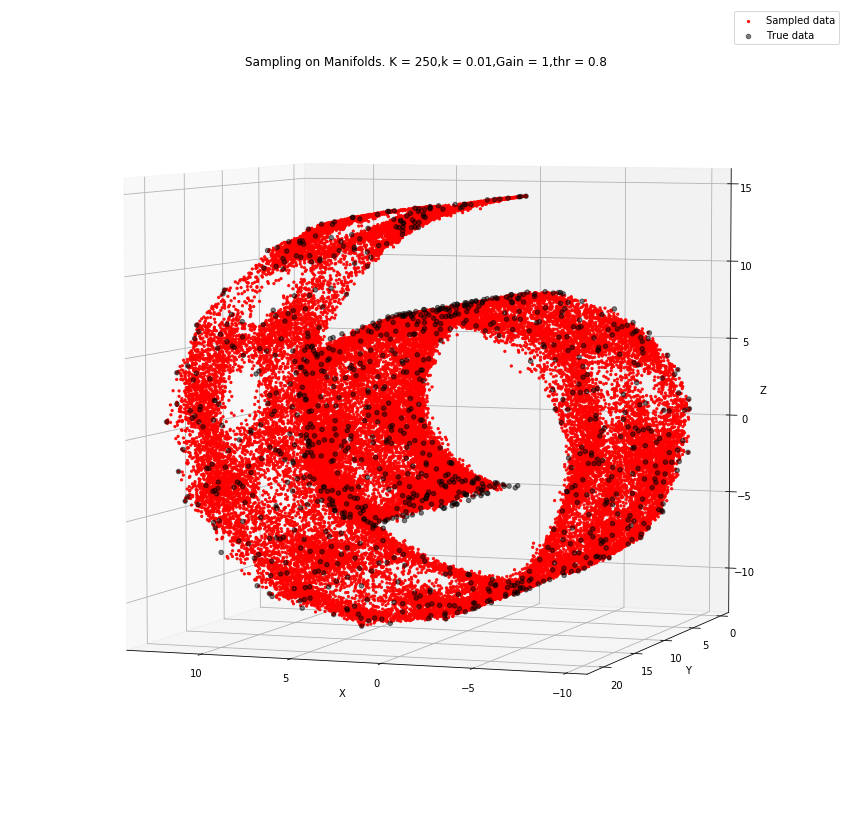

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_O['x'],df_O['y'],df_O['z'],color = 'red',marker = '.',alpha = 0.9,label = 'Sampled data')
ax.scatter(df['x'],df['y'],df['z'],color = 'black',alpha = 0.5,label = 'True data')
#ax.scatter(sampled['x'],sampled['y'],sampled['z'],marker = '.',label = 'Copula Strategy')
plt.title('Sampling on Manifolds. K = {},k = {},Gain = {},thr = {}'.format(b,K,Gain,thr))
ax.view_init(elev=5., azim=110)
ax.set_xlabel('X',fontsize=10)
ax.set_ylabel('Y',fontsize=10)
ax.set_zlabel('Z',fontsize=10)
plt.legend()

## Example 3: S-curve

In [24]:
n_samples = 1000
noise = 0.01
X, _ = make_s_curve(n_samples,noise = noise)#
df = pd.DataFrame(X,columns = ['x','y','z'])
b = 50
Gain = 1
K = 0.95
thr = 0.8
df_O = sampler(50000,b,df,Gain = Gain,K =K,thr = thr,metric = euclidean)

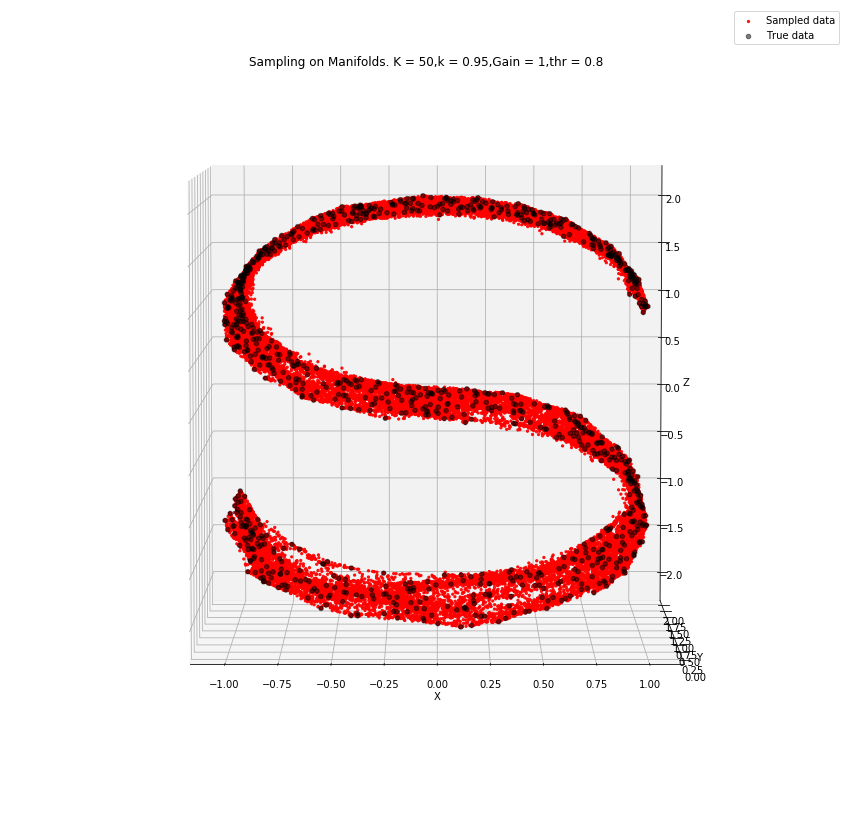

In [26]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_O['x'],df_O['y'],df_O['z'],color = 'red',marker = '.',alpha = 0.9,label = 'Sampled data')
ax.scatter(df['x'],df['y'],df['z'],color = 'black',alpha = 0.5,label = 'True data')
#ax.scatter(sampled['x'],sampled['y'],sampled['z'],marker = '.',label = 'Copula Strategy')
plt.title('Sampling on Manifolds. K = {},k = {},Gain = {},thr = {}'.format(b,K,Gain,thr))
ax.view_init(elev=5., azim=270)
ax.set_xlabel('X',fontsize=10)
ax.set_ylabel('Y',fontsize=10)
ax.set_zlabel('Z',fontsize=10)
plt.legend()